In [1]:
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

In [2]:
gdf = gpd.read_file('Resources/acs2019_5yr_B03002_14000US29510104500.geojson')

# Data Exploration

In [3]:
gdf.shape

(106, 45)

In [4]:
gdf.tail()

,geoid,name,B03002001,"B03002001, Error",B03002002,"B03002002, Error",B03002003,"B03002003, Error",B03002004,"B03002004, Error",...,"B03002017, Error",B03002018,"B03002018, Error",B03002019,"B03002019, Error",B03002020,"B03002020, Error",B03002021,"B03002021, Error",geometry
101,14000US29510127200,"Census Tract 1272, St. Louis, MO",4243.0,556.0,4186.0,564.0,2554.0,342.0,1208.0,595.0,...,11.0,0.0,11.0,11.0,23.0,11.0,23.0,0.0,11.0,"MULTIPOLYGON (((-90.29184 38.60237, -90.29184 ..."
102,14000US29510127300,"Census Tract 1273, St. Louis, MO",4115.0,375.0,3900.0,424.0,1289.0,176.0,2479.0,409.0,...,11.0,60.0,54.0,0.0,11.0,0.0,11.0,0.0,11.0,"MULTIPOLYGON (((-90.24539 38.61477, -90.24525 ..."
103,14000US29510127400,"Census Tract 1274, St. Louis, MO",4814.0,924.0,4795.0,924.0,1276.0,334.0,3474.0,1003.0,...,11.0,0.0,11.0,0.0,11.0,0.0,11.0,0.0,11.0,"MULTIPOLYGON (((-90.22629 38.61937, -90.22625 ..."
104,14000US29510127500,"Census Tract 1275, St. Louis, MO",2225.0,221.0,2088.0,217.0,488.0,143.0,1487.0,212.0,...,11.0,13.0,21.0,0.0,11.0,0.0,11.0,0.0,11.0,"MULTIPOLYGON (((-90.21853 38.63329, -90.21844 ..."
105,14000US29510127600,"Census Tract 1276, St. Louis, MO",2688.0,310.0,2645.0,297.0,2044.0,239.0,535.0,236.0,...,11.0,0.0,11.0,0.0,11.0,0.0,11.0,0.0,11.0,"MULTIPOLYGON (((-90.21346 38.60031, -90.21336 ..."


<AxesSubplot:>

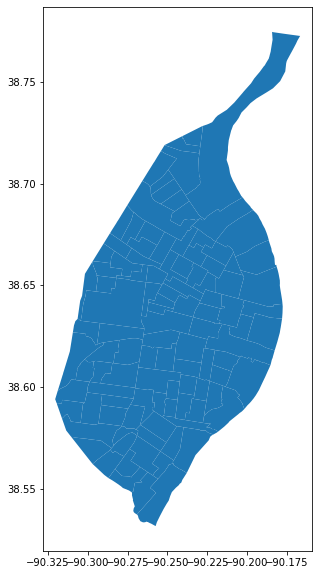

In [5]:
gdf.plot(figsize=(10,10))

In [6]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             106 non-null    object  
 1   name              106 non-null    object  
 2   B03002001         106 non-null    float64 
 3   B03002001, Error  106 non-null    float64 
 4   B03002002         106 non-null    float64 
 5   B03002002, Error  106 non-null    float64 
 6   B03002003         106 non-null    float64 
 7   B03002003, Error  106 non-null    float64 
 8   B03002004         106 non-null    float64 
 9   B03002004, Error  106 non-null    float64 
 10  B03002005         106 non-null    float64 
 11  B03002005, Error  106 non-null    float64 
 12  B03002006         106 non-null    float64 
 13  B03002006, Error  106 non-null    float64 
 14  B03002007         106 non-null    float64 
 15  B03002007, Error  106 non-null    float64 
 16  B03002008         

# Data Cleaning

In [7]:
columns_to_keep = ['geoid', 'name',
 'B03002001',
 'B03002002',
 'B03002003',
 'B03002004',
 'B03002005',
 'B03002006',
 'B03002007',
 'B03002008',
 'B03002009',
 'B03002012',
 'geometry']

In [8]:
gdf = gdf[columns_to_keep]

In [9]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   geoid      106 non-null    object  
 1   name       106 non-null    object  
 2   B03002001  106 non-null    float64 
 3   B03002002  106 non-null    float64 
 4   B03002003  106 non-null    float64 
 5   B03002004  106 non-null    float64 
 6   B03002005  106 non-null    float64 
 7   B03002006  106 non-null    float64 
 8   B03002007  106 non-null    float64 
 9   B03002008  106 non-null    float64 
 10  B03002009  106 non-null    float64 
 11  B03002012  106 non-null    float64 
 12  geometry   106 non-null    geometry
dtypes: float64(10), geometry(1), object(2)
memory usage: 10.9+ KB


# Renaming the Columns

In [10]:
gdf.columns = ['geoid',
 'name',
 'Total',
 'Non Hispanic',
 'Non Hispanic White',
 'Non Hispanic Black',
 'Non Hispanic American Indian and Alaska Native',
 'Non Hispanic Asian',
 'Non Hispanic Native Hawaiian and Other Pacific Islander',
 'Non Hispanic Some other race',
 'Non Hispanic Two or more races',
 'Hispanic',
 'geometry']

In [11]:
gdf.head()

,geoid,name,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic,geometry
0,14000US29510101100,"Census Tract 1011, St. Louis, MO",2469.0,2203.0,1878.0,44.0,11.0,54.0,0.0,0.0,216.0,266.0,"MULTIPOLYGON (((-90.28704 38.55544, -90.28695 ..."
1,14000US29510101200,"Census Tract 1012, St. Louis, MO",3408.0,3341.0,2800.0,228.0,0.0,313.0,0.0,0.0,0.0,67.0,"MULTIPOLYGON (((-90.28291 38.55984, -90.28262 ..."
2,14000US29510101300,"Census Tract 1013, St. Louis, MO",4085.0,4062.0,3108.0,682.0,0.0,208.0,0.0,0.0,64.0,23.0,"MULTIPOLYGON (((-90.27362 38.56990, -90.27331 ..."
3,14000US29510101400,"Census Tract 1014, St. Louis, MO",2844.0,2807.0,1482.0,1020.0,0.0,94.0,129.0,33.0,49.0,37.0,"MULTIPOLYGON (((-90.25961 38.56250, -90.25946 ..."
4,14000US29510101500,"Census Tract 1015, St. Louis, MO",3160.0,3044.0,1456.0,1465.0,14.0,28.0,0.0,30.0,51.0,116.0,"MULTIPOLYGON (((-90.27272 38.54859, -90.27224 ..."


# Checking Data Integrity

In [12]:
random_tract = gdf.sample()
random_tract

,geoid,name,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic,geometry
69,14000US29510116302,"Census Tract 1163.02, St. Louis, MO",3123.0,2899.0,859.0,1140.0,8.0,778.0,0.0,26.0,88.0,224.0,"MULTIPOLYGON (((-90.25229 38.58630, -90.25222 ..."


In [13]:
# 'for the 0th record/row, get the value in the Total Column'
random_tract.iloc[0]['Total']

3123.0

In [14]:
print('Total Population: ' + str(random_tract.iloc[0]['Total']))

Total Population: 3123.0
